# Run MACs to call peaks

## macs2 2.2.7.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_info = pd.read_csv('/Users/sofiamr/code/repos/xentr10/chipseq/MACS/sample_info.txt', sep='\t')
sample_info['replicate'] = sample_info.sample_name.apply(lambda x: int(x.split('-')[-1]))
sample_info['sample_type'] = sample_info.sample_name.apply(lambda x: x.split(' ')[1].split('-')[0])
sample_info

alignment_file sample_name  replicate sample_type
0    XtGAF1-PE_sorted.bam    Xtr In-2          2          In
1    XtGAF2-PE_sorted.bam    Xtr Ig-2          2          Ig
2    XtGAF3-PE_sorted.bam    Xtr H3-2          2          H3
3    XtGAF4-PE_sorted.bam    Xtr CA-2          2          CA
4    XtGAF5-PE_sorted.bam    Xtr In-3          3          In
5    XtGAF6-PE_sorted.bam    Xtr Ig-3          3          Ig
6    XtGAF7-PE_sorted.bam    Xtr H3-3          3          H3
7    XtGAF8-PE_sorted.bam    Xtr CA-3          3          CA
8   Xt_6_CA_PE_sorted.bam    Xtr CA-1          1          CA
9   Xt_6_H4_PE_sorted.bam    Xtr H4-1          1          H4
10  Xt_6_S2_PE_sorted.bam    Xtr In-1          1          In

In [3]:
for rep in sorted(sample_info['replicate'].unique()):
    for controls in ['In']:
        for test in ['H3', 'CA', 'H4', 'Ig']:
            control_aln = sample_info.loc[(sample_info.replicate==rep) & (sample_info.sample_type==controls)].alignment_file.to_list()[0]
            
            test_ops  = sample_info.loc[(sample_info.replicate==rep) & (sample_info.sample_type==test)]
            if test_ops.shape[0]>0:
                test_aln = test_ops.alignment_file.to_list()[0]
                test_name = test_ops.sample_name.to_list()[0].replace('Xtr ','')
                macs_out_name = test_name.replace('-','_vs_input-rep')
                print ''.join(('macs2 callpeak -t ',test_aln,' -c ',control_aln ,' --broad -f BAM -g 1.44e+9 -n ', macs_out_name, ' --outdir  macs2_out 2>macs2_out/',macs_out_name,'.log'))

macs2 callpeak -t Xt_6_CA_PE_sorted.bam -c Xt_6_S2_PE_sorted.bam --broad -f BAM -g 1.44e+9 -n CA_vs_input-rep1 --outdir  macs2_out 2>macs2_out/CA_vs_input-rep1.log
macs2 callpeak -t Xt_6_H4_PE_sorted.bam -c Xt_6_S2_PE_sorted.bam --broad -f BAM -g 1.44e+9 -n H4_vs_input-rep1 --outdir  macs2_out 2>macs2_out/H4_vs_input-rep1.log
macs2 callpeak -t XtGAF3-PE_sorted.bam -c XtGAF1-PE_sorted.bam --broad -f BAM -g 1.44e+9 -n H3_vs_input-rep2 --outdir  macs2_out 2>macs2_out/H3_vs_input-rep2.log
macs2 callpeak -t XtGAF4-PE_sorted.bam -c XtGAF1-PE_sorted.bam --broad -f BAM -g 1.44e+9 -n CA_vs_input-rep2 --outdir  macs2_out 2>macs2_out/CA_vs_input-rep2.log
macs2 callpeak -t XtGAF2-PE_sorted.bam -c XtGAF1-PE_sorted.bam --broad -f BAM -g 1.44e+9 -n Ig_vs_input-rep2 --outdir  macs2_out 2>macs2_out/Ig_vs_input-rep2.log
macs2 callpeak -t XtGAF7-PE_sorted.bam -c XtGAF5-PE_sorted.bam --broad -f BAM -g 1.44e+9 -n H3_vs_input-rep3 --outdir  macs2_out 2>macs2_out/H3_vs_input-rep3.log
macs2 callpeak -t XtGAF8

In [4]:
# macs2 callpeak -t XtGAF3-PE_sorted.bam -c XtGAF1-PE_sorted.bam --nomodel --shift -100  --extsize 180 --broad -f BAM -g 1.44e+9 -n H3_vs_input-rep2 --outdir  macs2_out 2>macs2_out/H3_vs_input-rep2.log

## 1a. Load broadkPeak files

In [5]:
import glob 
broadPeak_df = pd.DataFrame()
for i in sorted(glob.glob('macs2_out/*broadPeak')):
    sample_id = i.split('/')[1].split('_peaks')[0]
    broadPeak = pd.read_csv(i,sep='\t', names=['chr','start','end','peak_num','score','strand','signalValue','pVal','qVal'])
    broadPeak['sample_id'] = sample_id
    if broadPeak.shape[0] == 0:
        print i, "no peaks"
    if broadPeak_df.shape[0] == 0:
        broadPeak_df = broadPeak
    else:
        broadPeak_df = broadPeak_df.append(broadPeak)

broadPeak_df['replicate'] = broadPeak_df.sample_id.apply(lambda x: int(x.split('rep')[1]))
broadPeak_df.loc[:,'qVal_true'] = broadPeak_df.qVal.apply(lambda x: 1/10**(x))
broadPeak_df.head()

macs2_out/H3_vs_input-rep2_peaks.broadPeak no peaks
macs2_out/Ig_vs_input-rep3_peaks.broadPeak no peaks


chr     start       end                 peak_num score strand  \
0  Chr1    587458    588058  CA_vs_input-rep1_peak_1    11      .   
1  Chr1   7090751   7091000  CA_vs_input-rep1_peak_2    38      .   
2  Chr1  10115661  10116056  CA_vs_input-rep1_peak_3    26      .   
3  Chr1  12356043  12356595  CA_vs_input-rep1_peak_4    18      .   
4  Chr1  13752205  13752415  CA_vs_input-rep1_peak_5    38      .   

   signalValue     pVal     qVal         sample_id  replicate  qVal_true  
0      3.07865  4.10113  1.12067  CA_vs_input-rep1          1   0.075741  
1      4.19020  7.18770  3.80501  CA_vs_input-rep1          1   0.000157  
2      1.92507  5.91945  2.64071  CA_vs_input-rep1          1   0.002287  
3      2.52330  5.04649  1.87206  CA_vs_input-rep1          1   0.013426  
4      3.70540  7.23299  3.82919  CA_vs_input-rep1          1   0.000148

## 1.b Load gappedPeak files

In [6]:
import glob 

cols_gapped =['Chrom', 'ChromStart', 'ChromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'signalValue', 'pValue', 'qValue']

gappedPeak_df = pd.DataFrame()
for i in sorted(glob.glob('macs2_out/*gappedPeak')):
    sample_id = i.split('/')[1].split('_peaks')[0]
    gappedPeak = pd.read_csv(i,sep='\t', names=cols_gapped)#['chr','start','end','peak_num','score','strand','signalValue','pVal','qVal'])
    gappedPeak['sample_id'] = sample_id
    
    gappedPeak.loc[:,'qVal_true'] = gappedPeak.qValue.apply(lambda x: 1/10**(x))
    if broadPeak.shape[0] == 0:
        print i, "no peaks"
    if gappedPeak_df.shape[0] == 0:
        gappedPeak_df = gappedPeak
    else:
        gappedPeak_df = gappedPeak_df.append(gappedPeak)
    new_file_name = i.replace('macs2_out/','macs2_out/significant/')+'_pval05'
    gappedPeak[(gappedPeak.qVal_true<0.05) & (gappedPeak.signalValue>2)][cols_gapped].to_csv(new_file_name, sep='\t', index=False, header=False)

gappedPeak_df['replicate'] = gappedPeak_df.sample_id.apply(lambda x: int(x.split('rep')[1]))
gappedPeak_df.loc[:,'qVal_true'] = gappedPeak_df.qValue.apply(lambda x: 1/10**(x))
gappedPeak_df.head()

### bedtools  multiinter -i  CA_vs_input-rep1_peaks.gappedPeak_pval05 CA_vs_input-rep2_peaks.gappedPeak_pval05 CA_vs_input-rep3_peaks.gappedPeak_pval05 H3_vs_input-rep2_peaks.gappedPeak_pval05 H3_vs_input-rep3_peaks.gappedPeak_pval05 H4_vs_input-rep1_peaks.gappedPeak_pval05 Ig_vs_input-rep2_peaks.gappedPeak_pval05 Ig_vs_input-rep3_peaks.gappedPeak_pval05  -names CA-1 CA-2 CA-3 H3-2 H3-3 H4-1 Ig-2 Ig-3 | grep "CA-1,CA-2,CA-3" | grep -v H4 | grep -v H3 | less


macs2_out/CA_vs_input-rep1_peaks.gappedPeak no peaks
macs2_out/CA_vs_input-rep2_peaks.gappedPeak no peaks
macs2_out/CA_vs_input-rep3_peaks.gappedPeak no peaks
macs2_out/H3_vs_input-rep2_peaks.gappedPeak no peaks
macs2_out/H3_vs_input-rep3_peaks.gappedPeak no peaks
macs2_out/H4_vs_input-rep1_peaks.gappedPeak no peaks
macs2_out/Ig_vs_input-rep2_peaks.gappedPeak no peaks
macs2_out/Ig_vs_input-rep3_peaks.gappedPeak no peaks


Chrom ChromStart  ChromEnd                     name score strand thickStart  \
0  Chr1     587458    588058  CA_vs_input-rep1_peak_1    11      .     587458   
1  Chr1    7090751   7091000  CA_vs_input-rep1_peak_2    38      .    7090751   
2  Chr1   10115661  10116056  CA_vs_input-rep1_peak_3    26      .   10115661   
3  Chr1   12356043  12356595  CA_vs_input-rep1_peak_4    18      .   12356043   
4  Chr1   13752205  13752415  CA_vs_input-rep1_peak_5    38      .   13752205   

   thickEnd itemRgb blockCount blockSizes blockStarts  signalValue   pValue  \
0    588058       0          2        1,1       0,599      3.07865  4.10113   
1   7091000       0          1        249           0      4.19020  7.18770   
2  10116056       0          2        1,1       0,394      1.92507  5.91945   
3  12356595       0          2        1,1       0,551      2.52330  5.04649   
4  13752415       0          1        210           0      3.70540  7.23299   

    qValue         sample_id  qVal_true  replicate  
0  1.12067  CA_vs_input-rep1   0.075741          1  
1  3.80501  CA_vs_input-rep1   0.000157          1  
2  2.64071  CA_vs_input-rep1   0.002287          1  
3  1.87206  CA_vs_input-rep1   0.013426          1  
4  3.82919  CA_vs_input-rep1   0.000148          1

## 2. Print out signfificant gapped peaks (pval<0.05) and create multiinter

In [7]:
### cd /Users/sofiamr/code/repos/xentr10/chipseq/MACS/macs2_out/significant
### bedtools  multiinter -i  CA_vs_input-rep1_peaks.gappedPeak_pval05 CA_vs_input-rep2_peaks.gappedPeak_pval05 CA_vs_input-rep3_peaks.gappedPeak_pval05 H3_vs_input-rep2_peaks.gappedPeak_pval05 H3_vs_input-rep3_peaks.gappedPeak_pval05 H4_vs_input-rep1_peaks.gappedPeak_pval05 Ig_vs_input-rep2_peaks.gappedPeak_pval05 Ig_vs_input-rep3_peaks.gappedPeak_pval05  -names CA-1 CA-2 CA-3 H3-2 H3-3 H4-1 Ig-2 Ig-3 -header   >multiinter.tab

multiinter = pd.read_csv('macs2_out/significant/multiinter.tab', sep='\t')#, names=cols_multiinter)
multiinter[multiinter.list=='CA-1,CA-2,CA-3'][['chrom', 'start','end']].to_csv('macs2_out/significant/multiinter_CA.tab', sep='\t', index=False, header=False)
multiinter.head()


### cd /Users/sofiamr/code/repos/xentr10/chipseq/MACS/macs2_out/significant
### bedtools merge -i multiinter_CA.tab -d 10000 >multiinter_CA_merged.tab

chrom     start       end  num  list  CA-1  CA-2  CA-3  H3-2  H3-3  H4-1  \
0  Chr1   7090751   7091000    1  CA-1     1     0     0     0     0     0   
1  Chr1   7972471   7972688    1  H3-3     0     0     0     0     1     0   
2  Chr1  10115629  10116013    1  H3-3     0     0     0     0     1     0   
3  Chr1  11047737  11048055    1  H3-3     0     0     0     0     1     0   
4  Chr1  12356024  12356043    1  H4-1     0     0     0     0     0     1   

   Ig-2  Ig-3  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0

In [8]:
#Load multiinter merged file:
multiinter_merged = pd.read_csv('macs2_out/significant/multiinter_CA_merged.tab', sep='\t', names=['chrom','start','end'])#, names=cols_multiinter)
multiinter_merged['len (kb)'] = (multiinter_merged.end-multiinter_merged.start)/1000
multiinter_merged

# Whith a FDR < 5%, the three replicates of Cenp-A overlap the regions containing the centromeric tandem repeats for each of the chromosomes.

chrom     start       end  len (kb)
0    Chr1  89226685  89234733     8.048
1   Chr10  21196447  21219453    23.006
2   Chr10  21258093  21264377     6.284
3    Chr2  67475087  67524601    49.514
4    Chr2  67539525  67556910    17.385
5    Chr3  16699853  16774056    74.203
6    Chr3  41979168  41979596     0.428
7    Chr4  17719219  17719247     0.028
8    Chr4  46570574  46607388    36.814
9    Chr5  61990707  62026136    35.429
10   Chr6  73075044  73094467    19.423
11   Chr6  73104513  73111934     7.421
12   Chr7  60270358  60305226    34.868
13   Chr7  60316932  60351747    34.815
14   Chr7  60361836  60365680     3.844
15   Chr7  60376034  60394616    18.582
16   Chr7  60503628  60503945     0.317
17   Chr8  21340242  21364201    23.959
18   Chr8  21383123  21383569     0.446
19   Chr8  21396838  21399618     2.780
20   Chr8  21426913  21443288    16.375
21   Chr8  21459437  21491139    31.702
22   Chr8  21504759  21516989    12.230
23   Chr9  42102523  42147387    44.864

In [9]:
gappedPeak_df[(gappedPeak_df.qVal_true<0.05) & (gappedPeak_df.signalValue>5)].groupby(['sample_id','replicate']).replicate.value_counts().unstack().fillna(0)

replicate                      1     2    3
sample_id        replicate                 
CA_vs_input-rep1 1          60.0   0.0  0.0
CA_vs_input-rep2 2           0.0  38.0  0.0
CA_vs_input-rep3 3           0.0   0.0  2.0
H3_vs_input-rep3 3           0.0   0.0  3.0
H4_vs_input-rep1 1           7.0   0.0  0.0

In [10]:
gappedPeak_df[(gappedPeak_df.qVal_true<0.05) & (gappedPeak_df.signalValue>2)].groupby(['sample_id','replicate']).replicate.value_counts().unstack().fillna(0)

replicate                        1      2      3
sample_id        replicate                      
CA_vs_input-rep1 1          1029.0    0.0    0.0
CA_vs_input-rep2 2             0.0  215.0    0.0
CA_vs_input-rep3 3             0.0    0.0  164.0
H3_vs_input-rep3 3             0.0    0.0  186.0
H4_vs_input-rep1 1           387.0    0.0    0.0
Ig_vs_input-rep2 2             0.0  132.0    0.0

In [11]:
gappedPeak_df[(gappedPeak_df.qVal_true<0.05) ].groupby(['sample_id','replicate']).replicate.value_counts().unstack().fillna(0)

replicate                        1      2      3
sample_id        replicate                      
CA_vs_input-rep1 1          1230.0    0.0    0.0
CA_vs_input-rep2 2             0.0  291.0    0.0
CA_vs_input-rep3 3             0.0    0.0  171.0
H3_vs_input-rep3 3             0.0    0.0  390.0
H4_vs_input-rep1 1           501.0    0.0    0.0
Ig_vs_input-rep2 2             0.0  132.0    0.0

In [12]:
x=0.051
b = 1/10**(x)
print b
print -np.log10(b)

0.889201117858
0.050999999999999955


In [13]:
broadPeak_df[ (broadPeak_df['qVal_true'] < .05) & (broadPeak_df['signalValue']>5)].groupby(['sample_id']).replicate.value_counts()

sample_id         replicate
CA_vs_input-rep1  1            60
CA_vs_input-rep2  2            38
CA_vs_input-rep3  3             2
H3_vs_input-rep3  3             3
H4_vs_input-rep1  1             7
Name: replicate, dtype: int64

In [14]:
broadPeak_df.groupby(['sample_id']).replicate.value_counts()

sample_id         replicate
CA_vs_input-rep1  1            1324
CA_vs_input-rep2  2             298
CA_vs_input-rep3  3             181
H3_vs_input-rep3  3             424
H4_vs_input-rep1  1             560
Ig_vs_input-rep2  2             135
Name: replicate, dtype: int64

# Plot broadPeaks identified by MACS (pval<0.05)

In [15]:
centromeres_xtr = pd.read_csv('/Users/sofiamr/Downloads/SourceData/Fig.2/Xtrop_centromere_positon.tab', sep='\t' , comment='#', index_col=0)
centromeres_xtr.head()


Specie   Chr  TandemRepeats
0    Xtr  Chr1       89200000
1    Xtr  Chr2       67500000
2    Xtr  Chr3       16700000
3    Xtr  Chr4       46600000
4    Xtr  Chr5       62000000

In [16]:

chr_sizes_xtr = pd.read_csv('/Users/sofiamr/Downloads/SourceData/Fig.2/Xtr_chr_sizes.tab', sep='\t' , comment='#')
chr_sizes_xtr.head()

Chr     Length
0  Chr1  217471166
1  Chr2  181034961
2  Chr3  153873357
3  Chr4  153961319
4  Chr5  164033575

(0, 89226685)


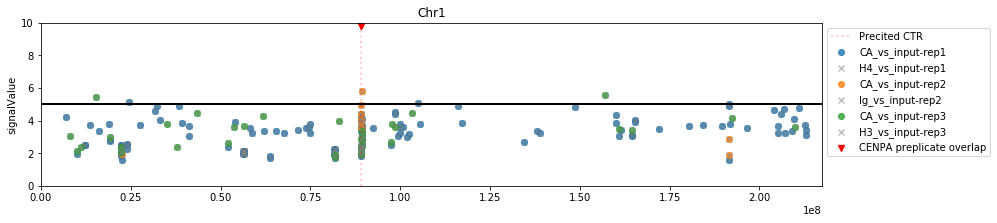

(3, 67475087)
(4, 67539525)


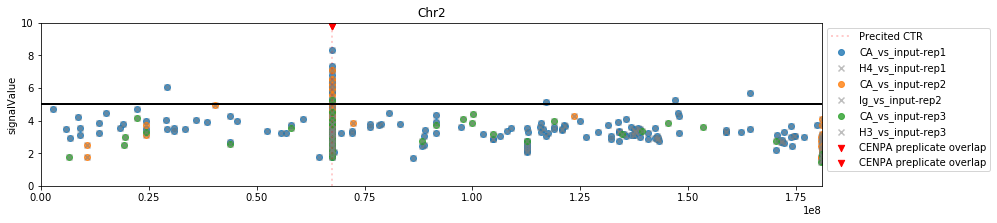

(5, 16699853)
(6, 41979168)


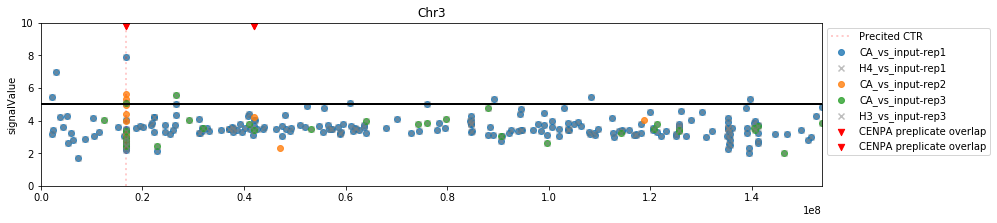

(7, 17719219)
(8, 46570574)


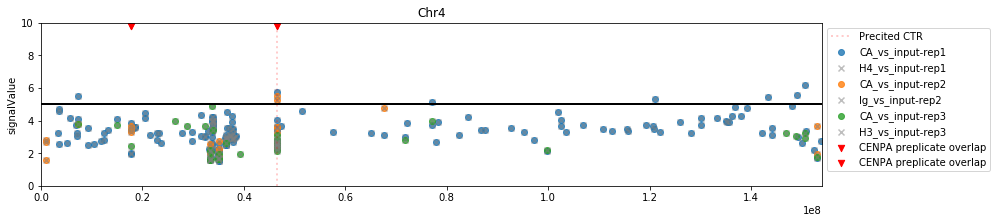

(9, 61990707)


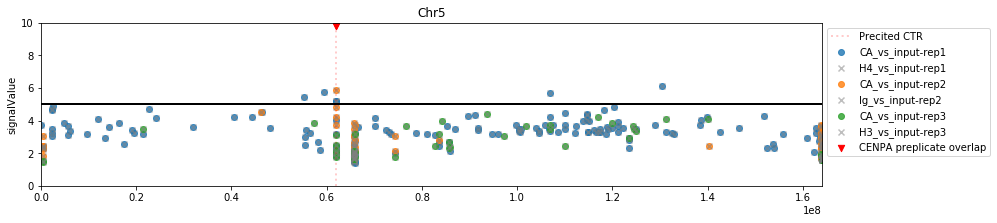

(10, 73075044)
(11, 73104513)


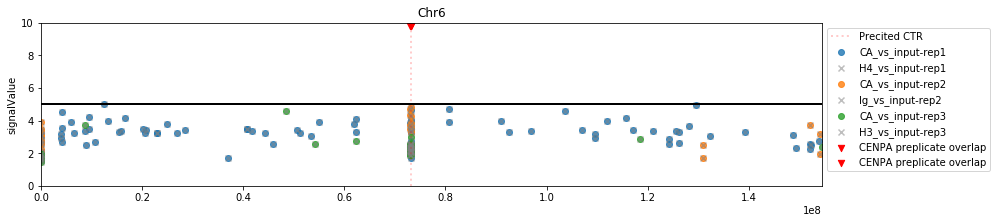

(12, 60270358)
(13, 60316932)
(14, 60361836)
(15, 60376034)
(16, 60503628)


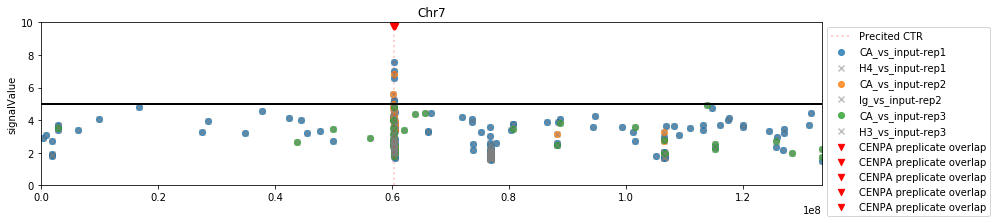

(17, 21340242)
(18, 21383123)
(19, 21396838)
(20, 21426913)
(21, 21459437)
(22, 21504759)


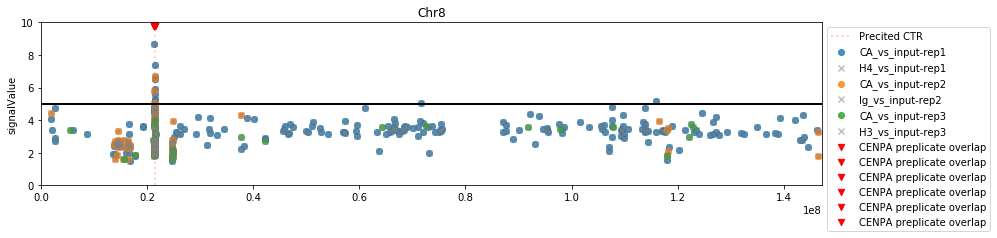

(23, 42102523)


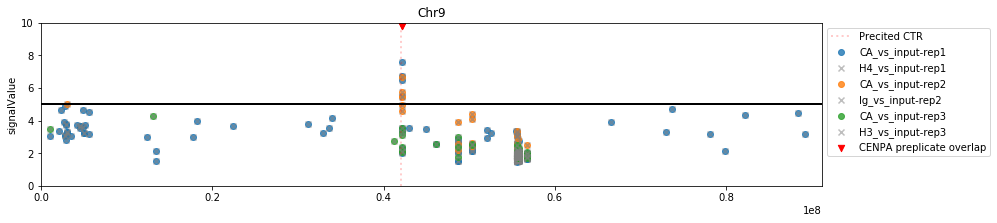

(1, 21196447)
(2, 21258093)


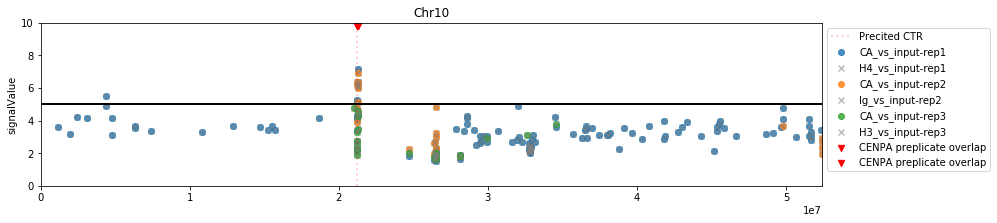

In [17]:
ylab= 'signalValue'

for chr_ in chr_sizes_xtr.Chr.to_list():
    plt.figure(figsize=(14,3))
    min_=0
    max_=chr_sizes_xtr[chr_sizes_xtr.Chr==chr_].Length.max()
    for replicate in broadPeak_df.replicate.unique():
        to_plot = broadPeak_df[(broadPeak_df.chr==chr_) & (broadPeak_df.replicate==replicate) & (broadPeak_df['qVal_true'] < 0.05)]# & (broadPeak_df['signalValue']>5)]
        for sample_id in sorted(to_plot.sample_id.unique()):
            if sample_id.startswith('CA'):
                plt.scatter(to_plot.start, to_plot[ylab],  label=sample_id, alpha=0.8)
                plt.legend(bbox_to_anchor=(1,1), loc=2)
            else:
                plt.scatter(to_plot.start, to_plot[ylab],  label=sample_id, alpha=0.5, color='gray', marker='x')
    if chr_ in centromeres_xtr.Chr.unique():
        plt.axvline(centromeres_xtr[centromeres_xtr.Chr==chr_].TandemRepeats.to_list()[0],  color='red', linestyle=':', alpha=0.2, linewidth=2, label='Precited CTR')
    for idx_ in multiinter_merged[multiinter_merged.chrom==chr_].index.to_list():
        print (idx_, multiinter_merged.loc[idx_].start)
        plt.scatter(multiinter_merged.loc[idx_].start, 9.8, color='red', s=40, marker='v', label='CENPA preplicate overlap')
        plt.scatter(multiinter_merged.loc[idx_].end, 9.8, color='red', s=40,marker='v')

    plt.legend(bbox_to_anchor=(1,1), loc=2)
    plt.xlim(min_,max_)
    plt.ylim(0,10)
    plt.axhline(5, color='black', linewidth=2)
    plt.title(chr_)
    plt.ylabel(ylab)
    plt.show()

In [18]:
broadPeak_df[ (broadPeak_df['qVal_true'] < .05) & (broadPeak_df['signalValue']>5)].sample_id.value_counts()

CA_vs_input-rep1    60
CA_vs_input-rep2    38
H4_vs_input-rep1     7
H3_vs_input-rep3     3
CA_vs_input-rep3     2
Name: sample_id, dtype: int64

In [20]:
df1 = pd.DataFrame(broadPeak_df.sample_id.value_counts()).rename(columns={'sample_id':'Total_peaks'})
df2 = pd.DataFrame(broadPeak_df[broadPeak_df.qVal_true<0.05].sample_id.value_counts()).rename(columns={'sample_id':'Tot_significant'})
df3 = pd.DataFrame(broadPeak_df[ (broadPeak_df['qVal_true'] < .05) & (broadPeak_df['signalValue']>5)].sample_id.value_counts()).rename(columns={'sample_id':'>5'})

In [21]:
summary_peaks = pd.merge(df1, df2, left_index=True, right_index=True).merge(df3, left_index=True, right_index=True)
summary_peaks

Total_peaks  Tot_significant  >5
CA_vs_input-rep1         1324             1230  60
H4_vs_input-rep1          560              501   7
H3_vs_input-rep3          424              390   3
CA_vs_input-rep2          298              291  38
CA_vs_input-rep3          181              171   2

60 of 1324 total peaks (4.8%), 38/298 (13%) and 2/181 (1.16%) peaks had a FDR <0.05 and above a signal level above 5. The vast majority of these peaks overlap the regions with centromeric-associated tandem repeat.

In [22]:
100*summary_peaks['>5']/summary_peaks['Total_peaks']

CA_vs_input-rep1     4.531722
H4_vs_input-rep1     1.250000
H3_vs_input-rep3     0.707547
CA_vs_input-rep2    12.751678
CA_vs_input-rep3     1.104972
dtype: float64

In [24]:
100*summary_peaks['>5']/summary_peaks['Tot_significant']

CA_vs_input-rep1     4.878049
H4_vs_input-rep1     1.397206
H3_vs_input-rep3     0.769231
CA_vs_input-rep2    13.058419
CA_vs_input-rep3     1.169591
dtype: float64